In [2]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("cars.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_modified = cv2.imread("car.jpg")
gray_modified = cv2.cvtColor(img_modified, cv2.COLOR_BGR2GRAY)

In [4]:
def show_image(img, figsize):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

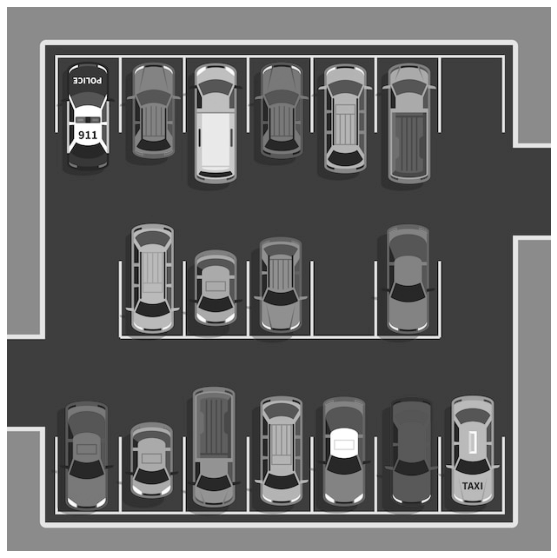

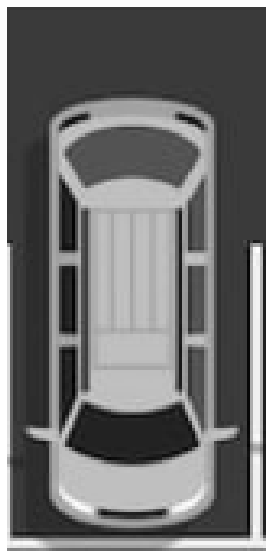

In [5]:
show_image(gray, (10, 10))
show_image(gray_modified, (10, 10))

In [6]:
def get_kp_and_des(img):

    orb = cv2.ORB_create()

    kp = orb.detect(img,None)

    kp, des = orb.compute(img, kp)
    return kp,des

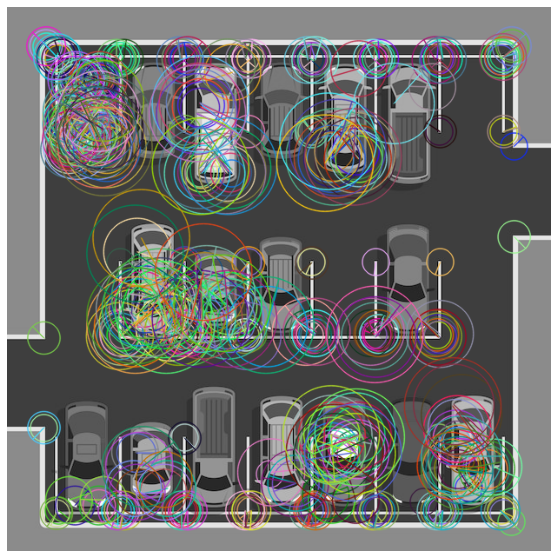

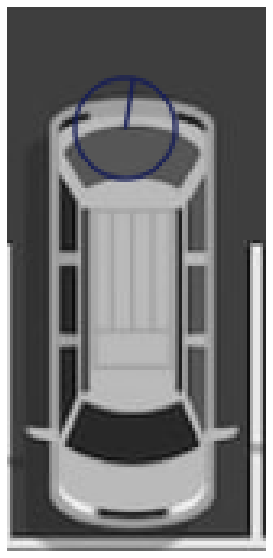

In [7]:
kp1, des1 = get_kp_and_des(gray)
kp2, des2 = get_kp_and_des(gray_modified)
keypoints_img1 = cv2.drawKeypoints(gray, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
keypoints_img2 = cv2.drawKeypoints(gray_modified, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
show_image(keypoints_img1, (10, 10))
show_image(keypoints_img2, (10, 10))

In [8]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)

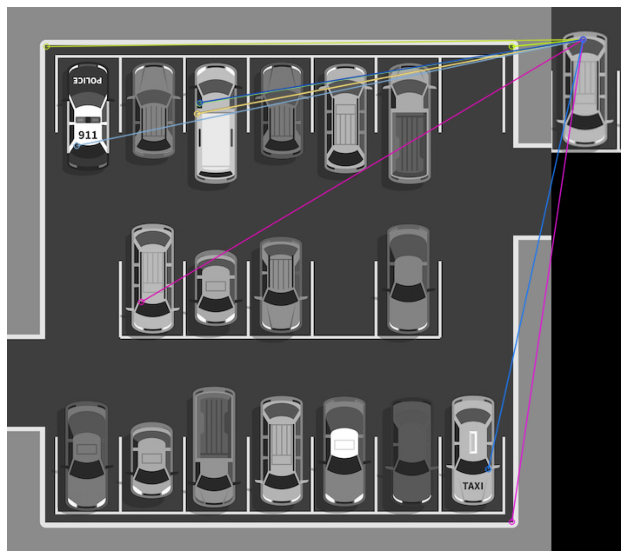

In [9]:
matched_img = cv2.drawMatches(gray, kp1, gray_modified, kp2, matches[:10],
                             None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show_image(matched_img, (20, 10))

In [10]:
def hamming_distance(des1, des2):
    res = 0
    des_num = len(des1)
    for i in range(des_num):
        res += bin(des1[i] ^ des2[i]).count("1")
    return res

In [11]:
def distance(des1, des2):
    return hamming_distance(des1, des2)

In [12]:
def get_matches(des1, des2):
    n = len(des1)
    m = len(des2)
    dmatches = []
    for i in range(n):
        des1_i = des1[i]
        min_dist = 999999999999999
        dmatch = cv2.DMatch()
        for j in range(m):
            des2_j = des2[j]
            dist_curr = distance(des1_i, des2_j)
            if dist_curr < min_dist:
                min_dist = dist_curr
                dmatch.distance = dist_curr 
                dmatch.imgIdx = 0
                dmatch.queryIdx = i
                dmatch.trainIdx = j
        dmatches.append(dmatch)
    return dmatches

In [13]:
my_matches = get_matches(des1, des2)
my_matches = sorted(my_matches, key = lambda x:x.distance)

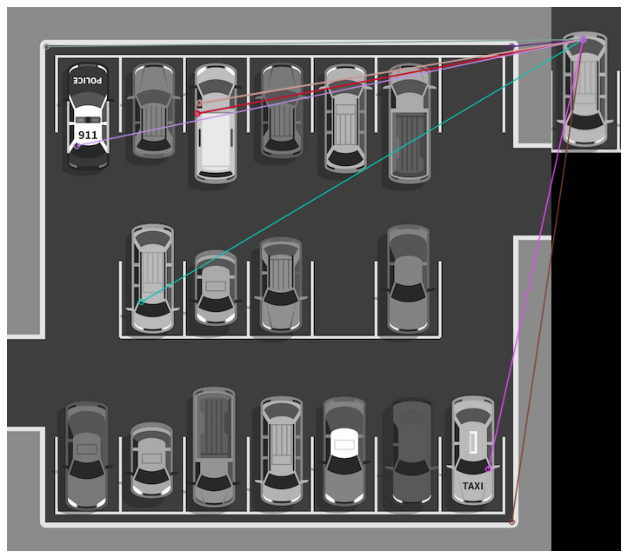

In [14]:
my_matched_img = cv2.drawMatches(gray, kp1, gray_modified, kp2, my_matches[:10],
                             None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show_image(my_matched_img, (20, 10))